<h1><b>Task_01</b> by GANESH SHELAR</h1>

GitHub Repo : [Link](https://github.com/ganeshs14/TSF-GRIP-DSBA-TASK/Task_01)

LinkedIn Profile : [Link](https://www.linkedin.com/in/ganesh-shelar)

YouTube Video : [Link](https://youtu.be/zaC4WQcy6j0)

# Linear Regression with Python Scikit Learn

> We are creating a simple linear regression involving two variables.


**Simple Linear Regression** :
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they have studied. This is a simple linear regression task as it involves just two variables [ Hours, Scores].

# Data Description

The dataset consist of two columns which contains Quantitative Data (Continuous Data).

> Scores : represent scores of students

> Hours : the number of hours they studied

# Importing Libraries

In [ ]:
# Important libraries for Data Analysis purpose.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Defining Dataset

> Link of Dataset : http://bit.ly/w-data

In [ ]:
# Creating a dataFrame by reading csv file
df = pd.read_csv('http://bit.ly/w-data')

In [ ]:
# First five datapoints from dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Last five datapoints from dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
# Shape of the dataset in form of (rows x columns)
df.shape

(25, 2)

# EDA - Exploratory Data Analysis

In [ ]:
# All columns in dataset
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
# Any 10 datapoints from dataset
df.sample(10)

,Hours,Scores
14,1.1,17
5,1.5,20
21,4.8,54
10,7.7,85
13,3.3,42
16,2.5,30
0,2.5,21
6,9.2,88
20,2.7,30
11,5.9,62


In [ ]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Conclusion:

* There are no null values in any column.

* Data type of the variables is in numerical form.

In [ ]:
# Column-wise total Null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
# Checking for any duplicated datapoint
df.duplicated().sum()

0

In [ ]:
# Basic statistical information about the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


> Use of Spearman's correlation method to co-relate each variable with one another.

In [ ]:
df.corr('spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


> Graphical representation of co-related data using colors and to visualize the value of the matrix.

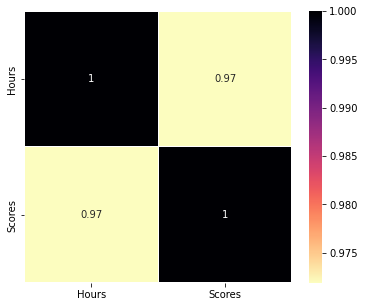

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr('spearman'), annot=True, cmap='magma_r', linewidths=0.2)
plt.show()

> To plot multiple pairwise bivariate distributions in a dataset.

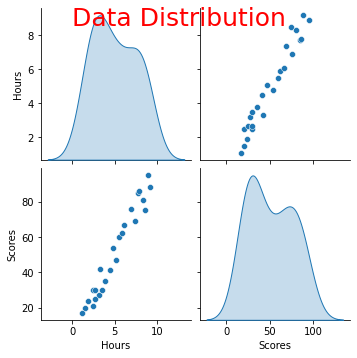

In [ ]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Data Distribution', size = 25, color='r')
plt.show()

> Boxplots for checking of outliers in our dataset.

<Figure size 720x720 with 0 Axes>

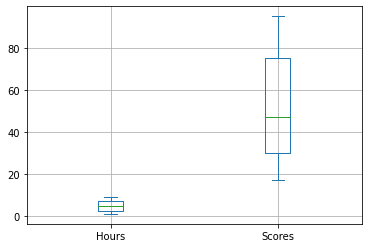

In [ ]:
plt.figure(figsize=(10,10))
df.plot(kind='box')
plt.grid(True)
plt.show()

# Importing ML libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Preparing data for the model

> Selecting the features (X) : Hours and the target (y) : Scores from dataset

In [ ]:
X = df.drop('Scores', axis=1)

y = df.Scores

# Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Selection, Training/Fitting, Performance Testing and Prediction

**`Linear Regression Model`**

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

> Creating the new Dataframe which contains the testing data, actual values and predicted values.

In [ ]:
new_df = pd.DataFrame({'Hours':X_test.Hours, 'Actual_Score':y_test, 'Predicted_Score':y_pred})

In [ ]:
new_df

,Hours,Actual_Score,Predicted_Score
8,8.3,81,83.107332
16,2.5,30,26.765598
0,2.5,21,26.765598
23,6.9,76,69.507603
11,5.9,62,59.793511
9,2.7,25,28.708416
13,3.3,42,34.536871


# Prediction of Score if Student studies for 9.25 hrs/day?

In [ ]:
hours = [np.array([9.25])]
score = model.predict(hours)
print(f"{score} %\n")

[92.33571987] %



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Conclusion : Predicted Score after Studying **9.25 hrs/day** is **92.33571987 %**

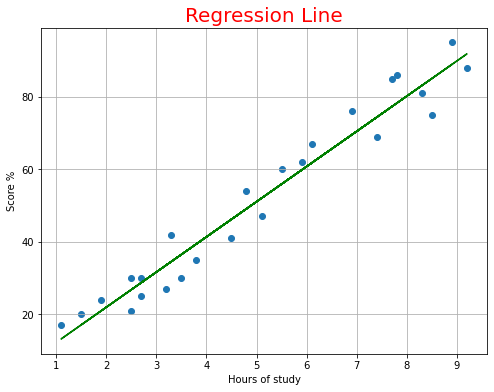

In [ ]:
# Plotting the regression line
line = model.coef_*X + model.intercept_

plt.figure(figsize=(8, 6))
plt.title('Regression Line',size=20, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Score %')
plt.scatter(X, y, marker='o')
plt.plot(X, line, c='g')
plt.grid(True)
plt.show()

> **r2_score** is a metric to check the performance of the testing dataset.

In [ ]:
r2_score(y_test, y_pred)

0.9553509219739938

# Evaluating the model

> Important step to compare how well different algorithms perform on a particular dataset. 

>For simplicity, I have chosen the mean square error.

In [ ]:
print('Mean Absolute Error for our model :', mean_absolute_error(y_test, y_pred))

Mean Absolute Error for our model : 4.425394675156182


# Pickling or Dumping the model

In [ ]:
import pickle
pickle.dump(model, open('reg_model.pkl', 'wb'))

* Conclusion : Pickling the Regression Model for further deployment process.

<h2 align='center'><b>Thank you!!</b></h2>